<a href="https://colab.research.google.com/github/Renata-Thomazelli/weather_temperature_analyze/blob/main/The_weather_temperature_analyze_of_SANDHEADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks/Weather')

In [ ]:
import csv

filename = '/content/drive/MyDrive/ColabNotebooks/Weather/Vancouver_CA_CITYCA000012.csv'
with open(filename) as f:
    reader =csv.reader(f)
    header_row = next(reader)
    print(header_row)

['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDFG', 'WESD', 'WESF', 'WSFG']


In [ ]:
import csv

filename = '/content/drive/MyDrive/ColabNotebooks/Weather/Vancouver_CA_CITYCA000012.csv'
with open(filename) as f:
    reader =csv.reader(f)
    header_row = next(reader)
    for index, column_reader in enumerate(header_row):
        print(index, column_reader)

0 STATION
1 NAME
2 DATE
3 DAPR
4 MDPR
5 PRCP
6 SNOW
7 SNWD
8 TAVG
9 TMAX
10 TMIN
11 WDFG
12 WESD
13 WESF
14 WSFG


In [ ]:
import matplotlib.pyplot as plt
plt.style.available #Checking styles availables



['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

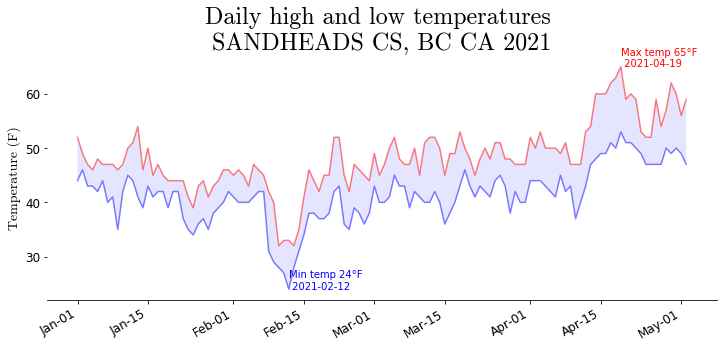

In [ ]:
import os
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import font_manager as fm, rcParams
fpath = os.path.join(rcParams["datapath"], "fonts/ttf") #/cmr10.ttf
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]



filename = '/content/drive/MyDrive/ColabNotebooks/Weather/Vancouver_CA_CITYCA000012.csv'
with open(filename) as f:
    reader =csv.reader(f)
    header_row = next(reader)

    #Defining the neighbor
    


    #Get dates, high and low temperatures from this file.
    dates, highs, lows = [], [], []
    for row in reader:
        station = row[0]
        if station =='CA001107010':
        
            current_date = datetime.strptime(row[2],'%Y-%m-%d').date()
            

            try:
                high =int(row[9])
                low = int(row[10])
            except ValueError:
                continue
                
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)

    #Defining and formating the plot
    
    plt.style.use('_classic_test_patch')
    fig,ax = plt.subplots(figsize=(12,5))
    fig.patch.set_facecolor('none') #To make a patch completely transparent
    ax.patch.set_facecolor('none') #To make a patch completely transparent
    ax.plot(dates,highs, c= 'red', alpha=0.5) #Formating the text on plot area high temperature
    ax.plot(dates,lows, c='blue', alpha=0.5) #Formating the text on plot area low temperature
    plt.fill_between(dates, highs, lows, facecolor = 'blue', alpha = 0.1)

    

    #Format title.
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    crmfont ={'fontname':'crm10'}
    title = "Daily high and low temperatures \nSANDHEADS CS, BC CA 2021"
    plt.title(title, fontsize = 24, fontname='cmr10')

    #Format axis labels.
    plt.xlabel('', fontsize = 14)
    fig.autofmt_xdate()
    plt.ylabel("Temperature (F)", fontsize = 14, fontname='cmr10')
    #plt.rcParams['xtick.labelsize'] = 2
    #plt.rcParams['ytick.labelsize'] = 2

    #Format axis.
    plt.tick_params(axis = "both", which='major', labelsize = 12,)
    # Define the date format
    date_form = DateFormatter("%b-%d")
    ax.xaxis.set_major_formatter(date_form)
       
    #Format plot area.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.grid(False)
    
    #Plot the high and low temperatures.
    max_temp = int(max(highs))
    min_temp = int(min(lows))

    #finding the higer temperature.
    for index,high_temp in enumerate(highs):
        if high_temp == max_temp:
            global index_high_temp
            index_high_temp = index
            #print(index)

            #print(max_temp)

    #finding the lower temperature.
    for index,low_temp in enumerate(lows):
        if low_temp == min_temp:
            global index_low_temp
            index_low_temp = index


    #Focal point at lower and higher temperature
    ax.text(dates[index_high_temp],max_temp,f"Max temp {max_temp}°F\n {dates[index_high_temp]}",dict(c= 'red'))
    ax.text(dates[index_low_temp],min_temp,f"Min temp {min_temp}°F\n {dates[index_low_temp]}",dict(c= 'blue'))
   
    plt.savefig("filename.png", transparent=True)

plt.show()
